In [379]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [380]:
# Importing the Libraries that is needed for the implementation
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score, log_loss,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from copy import copy,deepcopy

In [381]:
salary_information_data = pd.read_csv('SalaryDetails.csv')

In [382]:
salary_information_data.shape

(1052, 19)

In [383]:
salary_information_data.head(5)

,Id,Amount,Currency,Year,Work experience,Education,Company size,Designation,Status,Created at,Updated at,Primary technology,Pegged salary,Advice,Company base lk,Id [Salary votes],Vote type [Salary votes],Created at [Salary votes],Updated at [Salary votes]
0,3,120000,LKR,2018,1_to_3,bachelors_degree,100_to_500,senior_software_engineer,approved,5/24/2022 14:42,5/24/2022 14:42,reactjs,nil,-,True,NaN,NaN,NaN,NaN
1,4,65000,LKR,2020,1_to_3,bachelors_degree,100_to_500,associate_software_engineer,approved,5/24/2022 14:45,5/24/2022 14:45,javascript,nil,-,True,14,accurate,5/25/2022 11:29,5/25/2022 11:29
2,5,230000,LKR,2022,1_to_3,bachelors_degree,100_to_500,software_engineer,approved,5/24/2022 14:47,5/24/2022 14:47,-,nil,-,True,NaN,NaN,NaN,NaN
3,6,260000,LKR,2022,7_to_9,bachelors_degree,100_to_500,senior_ui_ux_engineer,approved,5/24/2022 15:11,5/24/2022 15:11,css,nil,-,True,"7,10","fake,accurate","May 24, 2022 16:00,May 24, 2022 18:17","May 24, 2022 16:00,May 24, 2022 18:17"
4,7,120000,LKR,2022,1_to_3,bachelors_degree,20_to_50,software_engineer,approved,5/24/2022 15:19,5/24/2022 15:19,php,nil,-,True,NaN,NaN,NaN,NaN


In [384]:
salary_information_data.isnull().sum()

Id                              0
Amount                          0
Currency                        0
Year                            0
Work experience                 0
Education                       0
Company size                    0
Designation                     0
Status                          0
Created at                    621
Updated at                    621
Primary technology            621
Pegged salary                 595
Advice                        621
Company base lk               595
Id [Salary votes]            1025
Vote type [Salary votes]     1025
Created at [Salary votes]    1025
Updated at [Salary votes]    1025
dtype: int64

In [385]:
#Removing unwanted columns from the dataset
salary_information_data = salary_information_data.drop(['Id [Salary votes]',
                                                        'Vote type [Salary votes]',
                                                        'Created at [Salary votes]',
                                                        'Updated at [Salary votes]','Created at','Updated at',
                                                        'Pegged salary','Company base lk'], axis =1)

In [386]:
salary_information_data.columns

Index(['Id', 'Amount', 'Currency', 'Year', 'Work experience', 'Education',
       'Company size', 'Designation', 'Status', 'Primary technology',
       'Advice'],
      dtype='object')

In [387]:
salary_information_data.head()

,Id,Amount,Currency,Year,Work experience,Education,Company size,Designation,Status,Primary technology,Advice
0,3,120000,LKR,2018,1_to_3,bachelors_degree,100_to_500,senior_software_engineer,approved,reactjs,-
1,4,65000,LKR,2020,1_to_3,bachelors_degree,100_to_500,associate_software_engineer,approved,javascript,-
2,5,230000,LKR,2022,1_to_3,bachelors_degree,100_to_500,software_engineer,approved,-,-
3,6,260000,LKR,2022,7_to_9,bachelors_degree,100_to_500,senior_ui_ux_engineer,approved,css,-
4,7,120000,LKR,2022,1_to_3,bachelors_degree,20_to_50,software_engineer,approved,php,-


In [388]:
salary_information_data = salary_information_data.drop(['Advice','Primary technology'], axis =1)

In [389]:
# Checking for the count of the Company Size
salary_information_data['Company size'].value_counts()

above_500        496
100_to_500       231
more_than_500    134
50_to_100         65
20_to_50          50
10_to_20          30
below_10          14
50 - 100           7
 -                 6
100 - 200          5
10 - 50            5
10_to_50           2
300+               2
500+               2
200 - 300          2
100_to_200         1
Name: Company size, dtype: int64

In [390]:
#Checking the Data type
data_type = salary_information_data.dtypes
data_type

Id                  int64
Amount              int64
Currency           object
Year                int64
Work experience    object
Education          object
Company size       object
Designation        object
Status             object
dtype: object

In [391]:
#Converting datatype as per the requirement
salary_information_data['Company size'] = salary_information_data['Company size'].astype('string') 
salary_information_data['Currency'] = salary_information_data['Currency'].astype('string')
salary_information_data['Education'] = salary_information_data['Education'].astype('string')
salary_information_data['Designation'] = salary_information_data['Designation'].astype('string')
salary_information_data['Status'] =salary_information_data['Status'].astype('string')
salary_information_data['Work experience'] =salary_information_data['Work experience'].astype('string')

In [392]:
data_type = salary_information_data.dtypes
data_type

Id                  int64
Amount              int64
Currency           string
Year                int64
Work experience    string
Education          string
Company size       string
Designation        string
Status             string
dtype: object

In [393]:
salary_information_data.loc[(salary_information_data['Company size'] == '500+'),'Company size'] = 'above_500'

In [394]:
salary_information_data.loc[(salary_information_data['Company size'] == '50 - 100'),'Company size'] = '50_to_100'

In [395]:
salary_information_data.loc[(salary_information_data['Company size'] == '100 - 200'),'Company size'] = '100_to_500'

In [396]:
salary_information_data.loc[(salary_information_data['Company size'] == '10 - 50'),'Company size'] = '20_to_50'

In [397]:
salary_information_data.loc[(salary_information_data['Company size'] == '10_to_50'),'Company size'] = '20_to_50'

In [398]:
salary_information_data.loc[(salary_information_data['Company size'] == '300+'),'Company size'] = '100_to_500'

In [399]:
salary_information_data.loc[(salary_information_data['Company size'] == 'above_500'),'Company size'] = 'more_than_500'

In [400]:
salary_information_data.loc[(salary_information_data['Company size'] == '200 - 300'),'Company size'] = '10_to_500'

In [401]:
salary_information_data.loc[(salary_information_data['Company size'] == '10_to_500'),'Company size'] = '10_to_20'

In [402]:
salary_information_data.loc[(salary_information_data['Company size'] == '100_to_200'),'Company size'] = '100_to_500'

In [403]:
condition = salary_information_data['Designation'].str.contains('-', case=False)
salary_information_data = salary_information_data.drop(salary_information_data[condition].index)

In [404]:
condition = salary_information_data['Company size'].str.contains('-', case=False)
salary_information_data = salary_information_data.drop(salary_information_data[condition].index)

In [405]:
# Checking for the count of the Company Size
salary_information_data['Company size'].value_counts()

more_than_500    621
100_to_500       234
50_to_100         69
20_to_50          56
10_to_20          29
below_10          14
Name: Company size, dtype: Int64

In [406]:
# Checking for the count of the Designation
salary_information_data['Designation'].value_counts()

software_engineer                       353
senior_software_engineer                120
architecture                             87
network_engineer                         47
associate_technical_lead                 35
                                       ... 
senior_data_architect                     1
lead_devops_engineer                      1
manager_it_operation                      1
junior_machine_learning_engineer          1
Associate Quality Assurance Engineer      1
Name: Designation, Length: 71, dtype: Int64

In [407]:
salary_information_data = salary_information_data.loc[(salary_information_data['Status'] == 'approved')]

In [408]:
salary_information_data.shape

(1003, 9)

In [409]:
salary_information_data.head()

,Id,Amount,Currency,Year,Work experience,Education,Company size,Designation,Status
0,3,120000,LKR,2018,1_to_3,bachelors_degree,100_to_500,senior_software_engineer,approved
1,4,65000,LKR,2020,1_to_3,bachelors_degree,100_to_500,associate_software_engineer,approved
2,5,230000,LKR,2022,1_to_3,bachelors_degree,100_to_500,software_engineer,approved
3,6,260000,LKR,2022,7_to_9,bachelors_degree,100_to_500,senior_ui_ux_engineer,approved
4,7,120000,LKR,2022,1_to_3,bachelors_degree,20_to_50,software_engineer,approved


In [410]:
# Checking for the count of the Education
salary_information_data['Education'].value_counts()

bachelors_degree    921
masters              44
higher_diploma       23
diploma              11
 -                    4
Name: Education, dtype: Int64

In [411]:
condition = salary_information_data['Education'].str.contains('-', case=False)
salary_information_data = salary_information_data.drop(salary_information_data[condition].index)

In [412]:
# Checking for the count of the Education
salary_information_data['Work experience'].value_counts()

1_to_3      337
4_to_6      316
0_to_1      248
7_to_9       55
10_to_14     33
15+          10
Name: Work experience, dtype: Int64

In [413]:
# Checking for the count of the Currency
salary_information_data['Currency'].value_counts()

LKR    877
USD     87
AUD     13
GBP     11
EUR      7
SGD      4
Name: Currency, dtype: Int64

In [414]:
salary_information_data[salary_information_data['Currency'] == 'USD'].head(90)

,Id,Amount,Currency,Year,Work experience,Education,Company size,Designation,Status
24,27,1500,USD,2022,1_to_3,bachelors_degree,100_to_500,senior_software_engineer,approved
27,30,1000,USD,2022,0_to_1,bachelors_degree,more_than_500,software_engineer,approved
39,42,7000,USD,2022,4_to_6,bachelors_degree,20_to_50,software_engineer,approved
43,46,3562,USD,2022,10_to_14,bachelors_degree,more_than_500,senior_tech_lead,approved
59,62,2600,USD,2022,4_to_6,masters,more_than_500,associate_tech_lead,approved
...,...,...,...,...,...,...,...,...,...
411,414,15000,USD,2022,15+,masters,20_to_50,CTO,approved
415,418,990,USD,2022,1_to_3,bachelors_degree,20_to_50,qa_engineer,approved
431,434,200,USD,2022,0_to_1,bachelors_degree,100_to_500,Internship,approved
449,452,250,USD,2022,1_to_3,bachelors_degree,100_to_500,Technical Lead,approved


In [415]:
# Filter the rows where the Currency is USD
usd_mask = salary_information_data['Currency'] == 'USD'

# Convert the values in the 'Amount' column from USD to LKR using a lambda function
salary_information_data.loc[usd_mask, 'Amount'] = salary_information_data.loc[usd_mask, 'Amount'].apply(lambda x: x * 320)

# Update the 'Currency' column to 'LKR' for the filtered rows
salary_information_data.loc[usd_mask, 'Currency'] = 'LKR'

In [416]:
# Checking for the count of the Currency
salary_information_data['Currency'].value_counts()

LKR    964
AUD     13
GBP     11
EUR      7
SGD      4
Name: Currency, dtype: Int64

In [417]:
# Filter the rows where the Currency is AUD
aud_mask = salary_information_data['Currency'] == 'AUD'

# Convert the values in the 'Amount' column from AUD to LKR using a lambda function
salary_information_data.loc[aud_mask, 'Amount'] = salary_information_data.loc[aud_mask, 'Amount'].apply(lambda x: x * 212)

# Update the 'Currency' column to 'LKR' for the filtered rows
salary_information_data.loc[aud_mask, 'Currency'] = 'LKR'

In [418]:
# Filter the rows where the Currency is GBP
gbp_mask = salary_information_data['Currency'] == 'GBP'

# Convert the values in the 'Amount' column from AUD to GBP using a lambda function
salary_information_data.loc[gbp_mask, 'Amount'] = salary_information_data.loc[gbp_mask, 'Amount'].apply(lambda x: x * 398)

# Update the 'Currency' column to 'LKR' for the filtered rows
salary_information_data.loc[gbp_mask, 'Currency'] = 'LKR'

In [419]:
# Filter the rows where the Currency is EUR
eur_mask = salary_information_data['Currency'] == 'EUR'

# Convert the values in the 'Amount' column from LKR to GBP using a lambda function
salary_information_data.loc[eur_mask, 'Amount'] = salary_information_data.loc[eur_mask, 'Amount'].apply(lambda x: x * 349)

# Update the 'Currency' column to 'LKR' for the filtered rows
salary_information_data.loc[eur_mask, 'Currency'] = 'LKR'

In [420]:
# Filter the rows where the Currency is SGD
sgd_mask = salary_information_data['Currency'] == 'SGD'

# Convert the values in the 'Amount' column from LKR to SGD using a lambda function
salary_information_data.loc[sgd_mask, 'Amount'] = salary_information_data.loc[sgd_mask, 'Amount'].apply(lambda x: x * 241)

# Update the 'Currency' column to 'LKR' for the filtered rows
salary_information_data.loc[sgd_mask, 'Currency'] = 'LKR'

In [421]:
salary_information_data.shape

(999, 9)

In [422]:
salary_information_data.head()

,Id,Amount,Currency,Year,Work experience,Education,Company size,Designation,Status
0,3,120000,LKR,2018,1_to_3,bachelors_degree,100_to_500,senior_software_engineer,approved
1,4,65000,LKR,2020,1_to_3,bachelors_degree,100_to_500,associate_software_engineer,approved
2,5,230000,LKR,2022,1_to_3,bachelors_degree,100_to_500,software_engineer,approved
3,6,260000,LKR,2022,7_to_9,bachelors_degree,100_to_500,senior_ui_ux_engineer,approved
4,7,120000,LKR,2022,1_to_3,bachelors_degree,20_to_50,software_engineer,approved


In [423]:
# Checking for the count of the Status
salary_information_data['Status'].value_counts()

approved    999
Name: Status, dtype: Int64

In [424]:
# Checking for the count of the Education
salary_information_data['Designation'].value_counts()

software_engineer                 348
senior_software_engineer          119
architecture                       87
network_engineer                   47
associate_technical_lead           35
                                 ... 
lead_devops_engineer                1
Technical Lead                      1
UI/UX Engineer                      1
associate_reliability_engineer      1
senior_lead_ui_ux_engineer          1
Name: Designation, Length: 69, dtype: Int64

In [425]:
salary_information_data.loc[(salary_information_data['Designation'] == 'UI/UX Engineer'),'Designation'] = 'ui_ux_engineer'

In [426]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Software Engineer'),'Designation'] = 'software_engineer'

In [427]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Technical Lead'),'Designation'] = 'technical_lead'

In [428]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Business Analyst'),'Designation'] = 'business_analyst'

In [429]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Associate Quality Assurance Engineer'),'Designation'] = 'associate_quality_assurance_engineer'

In [430]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Associate Software Engineer'),'Designation'] = 'associate_software_engineer'

In [431]:
salary_information_data.loc[(salary_information_data['Designation'] == 'architect'),'Designation'] = 'architecture'

In [432]:
salary_information_data.loc[(salary_information_data['Designation'] == 'associate_architect'),'Designation'] = 'associate_architecture'

In [433]:
salary_information_data.loc[(salary_information_data['Designation'] == 'associate_tech_lead'),'Designation'] = 'associate_technical_lead'

In [434]:
salary_information_data.loc[(salary_information_data['Designation'] == 'tech_lead'),'Designation'] = 'technical_lead'

In [435]:
salary_information_data.loc[(salary_information_data['Designation'] == 'senior_tech_lead'),'Designation'] = 'senior_technical_lead'

In [436]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Senior Quality Assurance Engineer'),'Designation'] = 'senior_quality_assurance_engineer'

In [437]:
salary_information_data.loc[(salary_information_data['Designation'] == 'Quality Assurance Engineer'),'Designation'] = 'quality_assurance_engineer'

In [438]:
salary_information_data['Designation'].value_counts()

software_engineer                       350
senior_software_engineer                119
architecture                             92
associate_technical_lead                 59
network_engineer                         47
technical_lead                           44
qa_engineer                              33
associate_architecture                   27
associate_software_engineer              26
quality_assurance_lead                   15
senior_business_analyst                  15
Internship                               12
senior_devops_engineer                   12
ui_ux_engineer                           11
senior_qa_engineer                       11
devops_engineer                          10
system_engineer                           9
business_analyst                          9
senior_system_engineer                    6
project_manager                           6
senior_qa_lead                            5
senior_technical_lead                     5
qa_lead                         

In [439]:
#uniques_values = salary_information_data[["Work experience", "Education", "Company size", "Amount","Designation","Currency","Status","Year"]].drop_duplicates()

In [440]:
salary_information_data = salary_information_data.drop(['Currency','Status','Year'], axis =1)
salary_information_data = salary_information_data[["Work experience", "Education", "Company size", "Amount","Designation"]].drop_duplicates()

In [441]:
#uniques_values.to_csv('unique_salary.csv', index=False)

In [442]:
salary_information_data.to_csv('cleaned_salary.csv', index=False)

In [443]:
# Training the the model process after pre process
updated_dataset = pd.read_csv('cleaned_salary.csv')

In [444]:
updated_dataset.dtypes

Work experience    object
Education          object
Company size       object
Amount              int64
Designation        object
dtype: object

In [445]:
updated_dataset.shape

(524, 5)

In [446]:
updated_dataset.head()

,Work experience,Education,Company size,Amount,Designation
0,1_to_3,bachelors_degree,100_to_500,120000,senior_software_engineer
1,1_to_3,bachelors_degree,100_to_500,65000,associate_software_engineer
2,1_to_3,bachelors_degree,100_to_500,230000,software_engineer
3,7_to_9,bachelors_degree,100_to_500,260000,senior_ui_ux_engineer
4,1_to_3,bachelors_degree,20_to_50,120000,software_engineer


In [447]:
data_deep_copy = deepcopy(updated_dataset) 
data_deep_copy.shape

(524, 5)

In [448]:
for column_feature in updated_dataset.columns :
    if column_feature != 'Amount':
        print(column_feature)

Work experience
Education
Company size
Designation


In [449]:
label_encoding_process = preprocessing.LabelEncoder()

for column_feature in updated_dataset.columns :
        if column_feature != 'Amount' : 
            updated_dataset[column_feature] = label_encoding_process.fit_transform(updated_dataset[column_feature])
            print(column_feature)
print(updated_dataset.head())

Work experience
Education
Company size
Designation
   Work experience  Education  Company size  Amount  Designation
0                3          0             0  120000           48
1                3          0             0   65000           12
2                3          0             0  230000           54
3                5          0             0  260000           52
4                3          0             2  120000           54


In [450]:
updated_dataset.to_csv('encoded.csv', index=False)

In [451]:
# Saving encoded data to pickle file
with open('encoded_dataset.pkl', 'wb') as file:
    pickle.dump(updated_dataset, file)

In [452]:
independent_feature = 'Amount'
other_features = list(updated_dataset.columns)

other_features.remove(independent_feature)

X = updated_dataset[other_features]
y = updated_dataset[independent_feature]

In [453]:
from sklearn.model_selection import train_test_split

train_X, test_X,train_y, test_y = train_test_split(X, y, random_state=1)
train_y.head()

477    100000
314    235000
304    300000
521    240000
180    300000
Name: Amount, dtype: int64

In [454]:
test_X,test_Y = train_X,train_y

In [455]:
#Creating the model to get the best accuracy
random_forest_classifier_model = RandomForestClassifier(random_state=1,criterion='entropy')

#Training the model
random_forest_classifier_model.fit(train_X,train_y)

RandomForestClassifier(criterion='entropy', random_state=1)

In [456]:
import pickle

# Save the model to a file
with open('salary_recommendation_system_model.pkl', 'wb') as file:
    pickle.dump(random_forest_classifier_model, file)


In [457]:
prediction_of_salary = random_forest_classifier_model.predict(test_X)
print(f'Final Score : {accuracy_score(test_Y,prediction_of_salary)}')

Final Score : 0.5648854961832062


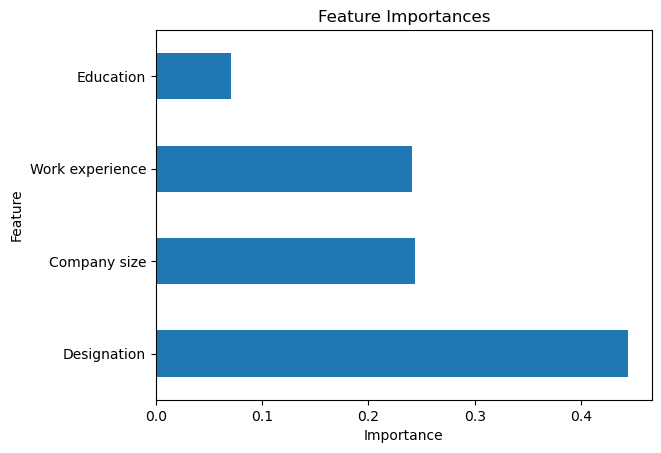

In [458]:
feat_importances = pd.Series(random_forest_classifier_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [459]:
#Precision Score
precision_score = precision_score(test_Y,prediction_of_salary, average='weighted',zero_division=1)
print(precision_score)

0.7314420148992267


In [460]:
#recall score
recall_score = recall_score(test_Y,prediction_of_salary, average='weighted')
print("Recall:", recall_score)

Recall: 0.5648854961832062


In [461]:
#F1 score
f1 = f1_score(test_Y,prediction_of_salary, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.5523443473814706


In [462]:
#roc and auc score
roc_auc = roc_auc_score(test_Y, random_forest_classifier_model.predict_proba(test_X), multi_class='ovo')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9952228150446363


In [463]:
#Confusion Matrix
cm = confusion_matrix(test_Y,prediction_of_salary)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [464]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1-score for each class
report = classification_report(test_Y, prediction_of_salary,zero_division=1)

# Print the report
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

       15000       0.67      1.00      0.80         2
       20000       0.40      0.50      0.44         4
       22000       1.00      1.00      1.00         1
       30000       0.62      0.62      0.62         8
       31360       1.00      0.00      0.00         1
       35000       0.50      0.50      0.50         2
       40000       0.20      0.50      0.29         4
       50000       1.00      0.00      0.00         6
       55000       1.00      0.00      0.00         1
       60000       0.50      0.54      0.52        13
       64000       0.33      1.00      0.50         1
       65000       1.00      0.00      0.00         1
       70000       0.21      0.29      0.24        14
       75000       0.60      0.75      0.67         4
       77000       1.00      0.00      0.00         1
       80000       0.56      0.36      0.43        14
       82000       1.00      1.00      1.00         1
    

In [465]:
mcc = matthews_corrcoef(test_Y,prediction_of_salary)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5597837635261315


In [466]:
kappa = cohen_kappa_score(test_Y,prediction_of_salary)
print("Cohen's Kappa Score:", kappa)

Cohen's Kappa Score: 0.5577848113760042


In [467]:
bal_acc = balanced_accuracy_score(test_Y,prediction_of_salary)
print("Balanced Accuracy Score:", bal_acc)

Balanced Accuracy Score: 0.6546929778296238


In [468]:
logloss = log_loss(test_Y, random_forest_classifier_model.predict_proba(test_X))
print("Logarithmic Loss:", logloss)

Logarithmic Loss: 1.1272968694153906


In [469]:
print(train_X.head())

     Work experience  Education  Company size  Designation
477                3          0             0           54
314                3          0             5           48
304                5          3             3           57
521                4          0             5           48
180                4          0             5           35


In [470]:
from sklearn.metrics import r2_score
r2 = r2_score(test_Y,prediction_of_salary)
print(f"R-squared score: {r2}")

R-squared score: 0.8091047783487202


In [471]:
output = random_forest_classifier_model.predict(train_X.head())

print("X: ",train_X.head(1))
print("Y: ", train_y.head(1))

print(output)

X:       Work experience  Education  Company size  Designation
477                3          0             0           54
Y:  477    100000
Name: Amount, dtype: int64
[175000 275000 300000 100000 300000]


In [472]:
import pickle

# Load the saved model from file
with open('salary_recommendation_system_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)
    
with open('encoded_dataset.pkl', 'rb') as file:
    encoding = pickle.load(file)


In [473]:
user_inputs = pd.DataFrame({
    'Work experience': [3],
    'Education': [0],
    'Company size': [0],
    'Designation': [48]
})

# Make a prediction for the user inputs
prediction = saved_model.predict(user_inputs)
print(prediction)

[230000]


In [474]:
# Create a TF-IDF vectorizer object and fit it to the content-based features in the input data
data = pd.read_csv('cleaned_salary.csv')

In [475]:
# Preprocess the text data for the TF-IDF matrix
data['text_features'] = data['Work experience'] + ' ' + data['Education'] + ' ' + data['Company size'] + ' ' + data['Designation']

# Compute the TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text_features'])

In [476]:
def get_similar_apps_for_all(input_one,input_two,input_three,input_four,Amount, N=10):
    try:
        input_index = data[ (data['Work experience'] == input_one) & (data['Education'] == input_two) & (data['Company size'] == input_three) & (data['Designation'] == input_four)].index[0]
        input_vec = tfidf_matrix[input_index]
        sim_scores = cosine_similarity(input_vec, tfidf_matrix)[0]
        sim_indices = sim_scores.argsort()[::-1][1:N+1]
        similar_apps = data.iloc[sim_indices][['Work experience','Education','Company size','Designation','Amount']]
        similar_apps = similar_apps[similar_apps['Amount'] != int(Amount)]
        return similar_apps
    except Exception as e:
        print(e)
        return [{'e': 'eeror'}]

In [477]:
# Define a function to get recommendations using the hybrid approach
def get_recommendations(input_one, input_two, input_three, input_four, N=10):
    
    for_prediction = pd.DataFrame({'Work experience': [3],'Education': [0],'Company size': [0],'Designation': [48]})
    model_salary = random_forest_classifier_model.predict(for_prediction)
    similar_jobs = get_similar_apps_for_all(input_one, input_two, input_three, input_four,model_salary, N=N)
    
    similar_jobs_df = pd.DataFrame(similar_jobs)
    similar_jobs_dict = similar_jobs_df.to_dict('records')
    recommendations_final_value = { 'content_salary': similar_jobs_dict,'model_salary': model_salary}
    return recommendations_final_value

In [478]:
get_recommendations('1_to_3', 'bachelors_degree', '100_to_500', 'senior_software_engineer', N=5)

{'content_salary': [{'Work experience': '1_to_3',
   'Education': 'bachelors_degree',
   'Company size': '100_to_500',
   'Designation': 'senior_software_engineer',
   'Amount': 440000},
  {'Work experience': '1_to_3',
   'Education': 'bachelors_degree',
   'Company size': '100_to_500',
   'Designation': 'senior_software_engineer',
   'Amount': 250000},
  {'Work experience': '1_to_3',
   'Education': 'bachelors_degree',
   'Company size': '100_to_500',
   'Designation': 'senior_software_engineer',
   'Amount': 90000},
  {'Work experience': '1_to_3',
   'Education': 'bachelors_degree',
   'Company size': '100_to_500',
   'Designation': 'senior_software_engineer',
   'Amount': 306800}],
 'model_salary': array([230000], dtype=int64)}

In [479]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
test_X,test_Y = train_X,train_y

# Create a Support Vector Machines classifier model and fit it to the training data
svm_model = SVC()
svm_model.fit(train_X, train_y)

# Make predictions on the test data and calculate the accuracy score
pred_y = svm_model.predict(test_X)
acc_score = accuracy_score(test_Y, pred_y)
print("Support Vector Machines Classifier Accuracy Score:", acc_score)


Support Vector Machines Classifier Accuracy Score: 0.05343511450381679


In [480]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X,train_y, test_y = train_test_split(X, y, random_state=1)
test_X,test_Y = train_X,train_y

# Create a decision tree classifier model and fit it to the training data
dtc_model = DecisionTreeClassifier(random_state=1,criterion='entropy')
dtc_model.fit(train_X, train_y)

# Make predictions on the test data and calculate the accuracy score
pred_y = dtc_model.predict(test_X)
acc_score = accuracy_score(test_Y, pred_y)
print("Decision Tree Classifier Accuracy Score:", acc_score)


Decision Tree Classifier Accuracy Score: 0.5648854961832062


In [481]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_X, test_X,train_y, test_y = train_test_split(X, y, random_state=1)
test_X,test_Y = train_X,train_y

# Create a K-Nearest Neighbors classifier model and fit it to the training data
knn_model = KNeighborsClassifier()
knn_model.fit(train_X, train_y)

# Make predictions on the test data and calculate the accuracy score
pred_y = knn_model.predict(test_X)
acc_score = accuracy_score(test_Y, pred_y)
print("K-Nearest Neighbors Classifier Accuracy Score:", acc_score)

K-Nearest Neighbors Classifier Accuracy Score: 0.16539440203562342
